**NAIVE BAYES**

**Works on the principle of conditional probability as given by Bayes Theorem. Basically gives conditional probability of Event A occuring given Event B has occured.**

**Using scki-kit learn's NewsGroup dataset for demonstration of Naive Bayes**


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**ADVANTAGES AND DISADVANTAGES:**

**1. Easy to implement. Needs less training data.**

**2. Highly scalable and can handle both continuous and discontinuous data.**

**3. Fast and can be used in real-time predictions (hence used in online shopping carts, spam filters etc)**

**4. Not sensitive to irrelavant features because the formula automatically adjusts for those features because they consider probability.**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**About the Dataset**

In [11]:
# This dataset consists of around 20,000 newsgroup documents, partitioned across 20 different newsgroups. Each document belongs to one of these 
# categories (target_names obtained below).

# When you fetch the dataset using libraries like scikit-learn (fetch_20newsgroups()), it returns a dictionary-like object.            
# This object has several keys, each corresponding to a specific aspect of the dataset:
#     'data': This key holds the actual text content of the documents. It's a list-like object where each element represents the text of a document.
#     'target': This key holds the target labels (categories) for each document. It's also a list-like object, where each element is an integer 
#               representing the category of the corresponding document.
#     'target_names': This key holds the human-readable names of the target categories (newsgroups). It's a list-like object where each element 
#                    corresponds to one of the categories, allowing you to interpret the integer target labels into meaningful category names.

# In the dataset, documents are organized based on their categories or newsgroups.
# # Each document is associated with a specific category, which is represented by a target label.

In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups

In [14]:
text = fetch_20newsgroups()
text.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [23]:
#As mentioned above, data is stored in dictionary like structure. Access data as you would a dictionary.
print(text['data'][2])

From: twillis@ec.ecn.purdue.edu (Thomas E Willis)
Subject: PB questions...
Organization: Purdue University Engineering Computer Network
Distribution: usa
Lines: 36

well folks, my mac plus finally gave up the ghost this weekend after
starting life as a 512k way back in 1985.  sooo, i'm in the market for a
new machine a bit sooner than i intended to be...

i'm looking into picking up a powerbook 160 or maybe 180 and have a bunch
of questions that (hopefully) somebody can answer:

* does anybody know any dirt on when the next round of powerbook
introductions are expected?  i'd heard the 185c was supposed to make an
appearence "this summer" but haven't heard anymore on it - and since i
don't have access to macleak, i was wondering if anybody out there had
more info...

* has anybody heard rumors about price drops to the powerbook line like the
ones the duo's just went through recently?

* what's the impression of the display on the 180?  i could probably swing
a 180 if i got the 80Mb disk

In [24]:
# Iterate over each target label and print it
i=0
for label in text['target']:
    i+=1
print(i)


11314


**The 20 newsgroups dataset provided by scikit-learn comes pre-divided into separate sets for training and testing. When we fetch the dataset using the fetch_20newsgroups() function, we have the option to specify which subset you want to fetch: either the training subset (subset='train') or the testing subset (subset='test').**

In [28]:
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')
print(train.data[-1])

From: gunning@cco.caltech.edu (Kevin J. Gunning)
Subject: stolen CBR900RR
Organization: California Institute of Technology, Pasadena
Lines: 12
Distribution: usa
NNTP-Posting-Host: alumni.caltech.edu
Summary: see above

Stolen from Pasadena between 4:30 and 6:30 pm on 4/15.

Blue and white Honda CBR900RR california plate KG CBR.   Serial number
JH2SC281XPM100187, engine number 2101240.

No turn signals or mirrors, lights taped over for track riders session
at Willow Springs tomorrow.  Guess I'll miss it.  :-(((

Help me find my baby!!!

kjg




**1. TfidfVectorizer is a text processing tool converting documents into a matrix of features based on the importance of words (weighing each word against its occurence). Each document becomes a vector of word scores. This helps machine learning algorithms understand and process text effectively**

**2. MultinomialNB is a type of Naive Bayes classifier specifically designed for text classification tasks. It's based on the assumption of multinomially distributed features, which makes it well-suited for modeling text data.**

**3. A pipeline is a sequence of data processing steps chained together, where the output of one step becomes the input to the next step. Scikit provides a pipeline function. Here, it is used to push output of TfidfVectorizer as input to MultinomialNB**

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#develop a pipeline to streamline this process 
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [32]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test.target, labels)
cm

array([[166,   0,   0,   1,   0,   1,   0,   0,   1,   1,   1,   3,   0,
          6,   3, 123,   4,   8,   0,   1],
       [  1, 252,  15,  12,   9,  18,   1,   2,   1,   5,   2,  41,   4,
          0,   6,  15,   4,   1,   0,   0],
       [  0,  14, 258,  45,   3,   9,   0,   2,   1,   3,   2,  25,   1,
          0,   6,  23,   2,   0,   0,   0],
       [  0,   5,  11, 305,  17,   1,   3,   6,   1,   0,   2,  19,  13,
          0,   5,   3,   1,   0,   0,   0],
       [  0,   3,   8,  23, 298,   0,   3,   8,   1,   3,   1,  16,   8,
          0,   2,   8,   3,   0,   0,   0],
       [  1,  21,  17,  13,   2, 298,   1,   0,   1,   1,   0,  23,   0,
          1,   4,  10,   2,   0,   0,   0],
       [  0,   1,   3,  31,  12,   1, 271,  19,   4,   4,   6,   5,  12,
          6,   3,   9,   3,   0,   0,   0],
       [  0,   1,   0,   3,   0,   0,   4, 364,   3,   2,   2,   4,   1,
          1,   3,   3,   4,   0,   1,   0],
       [  0,   0,   0,   1,   0,   0,   2,  10, 371,   0,   0,  

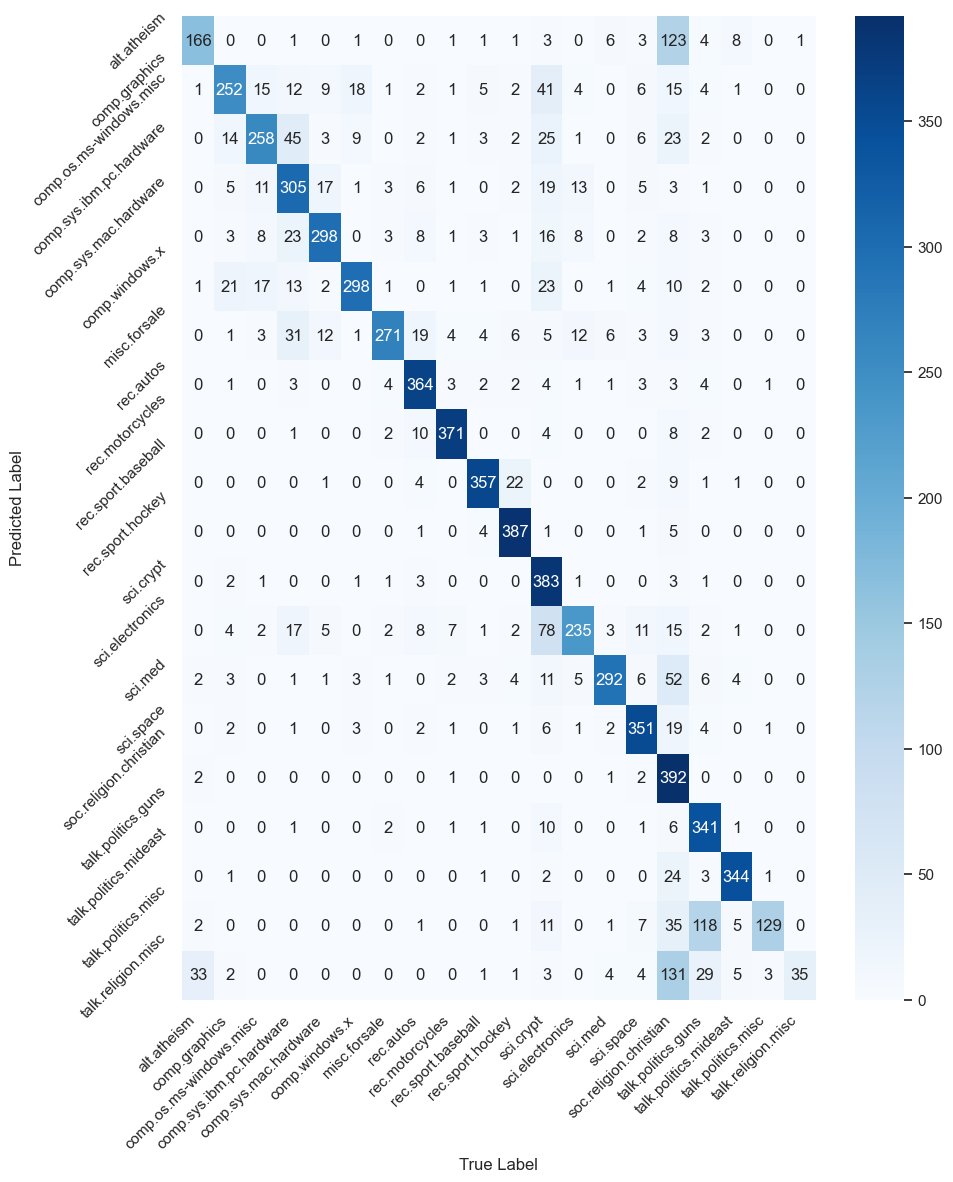

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))

sns.heatmap(cm, annot=True, fmt='d', cbar=True, cmap='Blues', 
            xticklabels=train.target_names, yticklabels=train.target_names)

plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=45, ha='right')  # Rotate y-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [56]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [62]:
predict_category('V8')

'rec.autos'

In [63]:
predict_category('Lean Angle')

'rec.motorcycles'

In [64]:
predict_category('Thrust')

'sci.space'